In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
from string import ascii_uppercase
import matplotlib.gridspec as gridspec
import itertools as it

In [2]:
def roundup(x, base=1.):
    return int(math.ceil(x / base)) * base


def rounddown(x, base=1.):
    return int(math.floor(x / base)) * base

In [3]:
def scatter_n_learnt(data, active, ax, x_label, y_label, fontsize_label):

    min_leitner = np.min(data.n_recall_leitner)
    min_act = np.min(data.n_recall_act)
    min_v = np.min((min_leitner, min_act))

    max_leitner = np.max(data.n_recall_leitner)
    max_act = np.max(data.n_recall_act)
    max_v = np.max((max_leitner, max_act))

    data = data[data.teacher_md == active]

    color = "C1" if active == "threshold" else "C2"

    sns.scatterplot(data=data,
                    x="n_recall_leitner",
                    y="n_recall_act",
                    color=color,
                    alpha=0.5, s=20,
                    ax=ax)
    
    ax.set_xlabel(x_label, fontsize=fontsize_label)
    ax.set_ylabel(y_label, fontsize=fontsize_label)

    ax.plot((min_v, max_v), (min_v, max_v), ls="--", color="black",
            alpha=0.1)

    ax.set_xticks((rounddown(min_v, base=10), roundup(max_v, base=10)))
    ax.set_yticks((rounddown(min_v, base=10), roundup(max_v, base=10)))

    ax.set_aspect(1)


def scatter_n_learnt_n_seen(data, active, ax, x_label, y_label, fontsize_label):

    min_leitner = np.min(data.ratio_leitner)
    min_act = np.min(data.ratio_act)
    min_v = np.min((min_leitner, min_act))

    max_leitner = np.max(data.ratio_leitner)
    max_act = np.max(data.ratio_act)
    max_v = np.max((max_leitner, max_act))

    data = data[data.teacher_md == active]

    color = "C1" if active == "threshold" else "C2"

    sns.scatterplot(data=data,
                    x="ratio_leitner",
                    y="ratio_act",
                    alpha=0.5, s=20, color=color, ax=ax)
    
    ax.set_xlabel(x_label, fontsize=fontsize_label)
    ax.set_ylabel(y_label, fontsize=fontsize_label)

    ax.plot((min_v, max_v), (min_v, max_v), ls="--", color="black",
            alpha=0.1)

    ax.set_xticks((rounddown(min_v, base=0.10), roundup(max_v, base=0.10)))
    ax.set_yticks((rounddown(min_v, base=0.10), roundup(max_v, base=0.10)))

    ax.set_aspect(1)


def boxplot(df, data_type, ylabel, axes, ylim, fontsize_label):

    color_dic = {"leitner": "C0", "threshold": "C1", "forward": "C2"}
    teacher_names = {"forward": "Cons.\nsampling",
                     "leitner": "Leitner",
                     "threshold": "Myopic"}

    for i, teacher in enumerate(('threshold', 'forward')):
        slc = df.teacher_md == teacher
        df_slc = df[slc]
        user = df_slc["user"]

        if data_type == "n_learnt":
            x = df_slc["n_recall_leitner"]
            y = df_slc["n_recall_act"]
        else:
            x = df_slc["ratio_leitner"]
            y = df_slc["ratio_act"]

        df_plot = pd.DataFrame({"user": user, "leitner": x, teacher: y})

        df_melt = df_plot.melt(id_vars=["user"],
                               value_vars=["leitner", teacher],
                               value_name=ylabel, var_name="teacher")

        ax = axes[i]

        order = ["leitner", teacher]
        colors = [color_dic[o] for o in order]
        ticklabels = [teacher_names[o] for o in order]

        sns.boxplot(data=df_melt, x="teacher", y=ylabel, ax=ax,
                    showfliers=False, order=order, palette=colors,
                    boxprops=dict(alpha=.5))
        sns.lineplot(data=df_melt,
                     x="teacher", y=ylabel, hue="user", alpha=0.4,
                     ax=ax, legend=False, marker="o")

        ax.set_xticklabels(ticklabels, fontsize=fontsize_label)
        ax.set_xlabel("")
        ax.set_ylabel(ylabel, fontsize=fontsize_label)

        ax.set_ylim(ylim)
        ax.set_xlabel("")

    axes[-1].set_ylabel("")

In [4]:
df = pd.read_csv(os.path.join("data", "human", "data_summary.csv"),
                 index_col=0)

df["ratio_leitner"] = df.n_recall_leitner / df.n_eval_leitner
df["ratio_act"] = df.n_recall_act / df.n_eval_act

# Select only the user that complete the task
df = df[df.n_ss_done == 14]

In [5]:
min_leitner = np.min(df.n_recall_leitner)
min_act = np.min(df.n_recall_act)
min_v = np.min((min_leitner, min_act))

max_leitner = np.max(df.n_recall_leitner)
max_act = np.max(df.n_recall_act)
max_v = np.max((max_leitner, max_act))

In [6]:
fig_folder = os.path.join("fig")
os.makedirs(fig_folder, exist_ok=True)

In [7]:
# Parameters plot
fontsize_title = 18
fontsize_subtitle = 18
fontsize_label_boxplot = 14
fontsize_letter = 20
fontsize_label_scatter = 14
figsize = (10, 6)

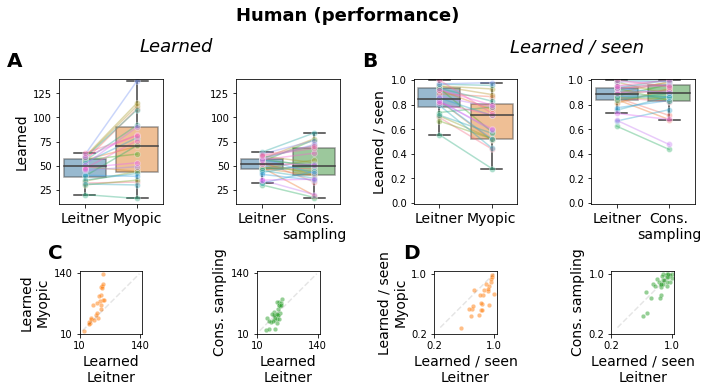

In [10]:
fig = plt.figure(figsize=figsize)  # 10, 6
fig.suptitle("Human (performance)", fontsize=fontsize_title, fontweight='bold', y=0.9)

# Create axes
gs = gridspec.GridSpec(2, 4, height_ratios=[0.6, 0.3])
axes = [fig.add_subplot(gs[i, j]) for (i, j) in list(it.product(range(2), range(4)))]

boxplot(df=df, axes=(axes[0], axes[1]),
        data_type="n_learnt",
        ylabel="Learned",
        ylim=(rounddown(min_v, base=10), roundup(max_v, base=10)),
        fontsize_label=fontsize_label_boxplot)

boxplot(df=df, axes=(axes[2], axes[3]),
        data_type="ratio",
        ylabel="Learned / seen",
        ylim=(-0.01, 1.01),
        fontsize_label=fontsize_label_boxplot)

scatter_n_learnt(data=df,
                 active="threshold",
                 x_label="Learned\nLeitner",
                 y_label="Learned\nMyopic",
                 ax=axes[4],
                 fontsize_label=fontsize_label_scatter)

scatter_n_learnt(data=df,
                 active="forward",
                 x_label="Learned\nLeitner",
                 y_label="Cons. sampling",
                 ax=axes[5],
                 fontsize_label=fontsize_label_scatter)

scatter_n_learnt_n_seen(data=df,
                        active="threshold",
                        x_label="Learned / seen\nLeitner",
                        y_label="Learned / seen\nMyopic",
                        ax=axes[6],
                        fontsize_label=fontsize_label_scatter)

scatter_n_learnt_n_seen(data=df,
                        active="forward",
                        x_label="Learned / seen\nLeitner",
                        y_label="Cons. sampling",
                        ax=axes[7],
                        fontsize_label=fontsize_label_scatter)


# Add letters
for i, ax_idx in enumerate((0, 2)):
    axes[ax_idx].text(-0.5, 1.1, ascii_uppercase[i],
                 transform=axes[ax_idx].transAxes, size=fontsize_letter, weight='bold')
for i, ax_idx in enumerate((4, 6)):
    axes[ax_idx].text(-0.5, 1.2, ascii_uppercase[i+2],
                 transform=axes[ax_idx].transAxes, size=fontsize_letter, weight='bold')

# Add subtitles
subtitles = "Learned\n", "Learned / seen\n"

gs = gridspec.GridSpec(1, 2)
axes = [fig.add_subplot(gs[i]) for i in range(2)]
for i in range(2):
    ax = axes[i]
    ax.set_axis_off()
    ax.set_title(subtitles[i], fontsize=fontsize_subtitle, fontstyle="italic")

plt.tight_layout() # rect=[0, 0, 1, 1])

plt.savefig(os.path.join(fig_folder, f"fig4.png"), dpi=300)
plt.savefig(os.path.join(fig_folder, f"fig4.pdf"))

# Statistics

In [9]:
print("Human" + " " + "*"*50)

n_comp = 2 # For the same user, we compare N recall and N learnt / N seen

print(f"n item learnt:")
for teacher in ('threshold', 'forward'):
    x = df[df.teacher_md == teacher]["n_recall_leitner"]
    y = df[df.teacher_md == teacher]["n_recall_act"]
    u, p = stats.mannwhitneyu(
        x=x,
        y=y,
        alternative='two-sided', use_continuity=False)
    print(f"{teacher} vs Leitner")
    p_f = f"$p={p:.3f}$" if p >= 0.001 else "$p<0.001$"
    pc = p*n_comp
    pc_f = "$p_{cor}" + f"={pc:.3f}$" if pc >= 0.001 else "$p_{cor}<0.001$"
    print(f"$u={u}$, {p_f}, {pc_f}, $N={len(x)}" + r"\times 2$")

print()
print(f"n learnt / n seen:")
for teacher in ('threshold', 'forward'):
    x = df[df.teacher_md == teacher]["ratio_leitner"]
    y = df[df.teacher_md == teacher]["ratio_act"]
    u, p = stats.mannwhitneyu(
        x=x,
        y=y,
        alternative='two-sided', use_continuity=True)
    print(f"{teacher} vs Leitner")
    p_f = f"$p={p:.3f}$" if p >= 0.001 else "$p<0.001$"
    pc = p*n_comp
    pc_f = "$p_{cor}" + f"={pc:.3f}$" if pc >= 0.001 else "$p_{cor}<0.001$"
    print(f"$u={u}$, {p_f}, {pc_f}, $N={len(x)}" + r"\times 2$")

print()
print()


Human **************************************************
n item learnt:
threshold vs Leitner
$u=174.5$, $p=0.019$, $p_{cor}=0.038$, $N=24\times 2$
forward vs Leitner
$u=434.5$, $p=0.828$, $p_{cor}=1.655$, $N=29\times 2$

n learnt / n seen:
threshold vs Leitner
$u=435.0$, $p=0.003$, $p_{cor}=0.005$, $N=24\times 2$
forward vs Leitner
$u=397.0$, $p=0.721$, $p_{cor}=1.441$, $N=29\times 2$


